## Data Exploration

In [ ]:
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-04-19 00:51:01.176124


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/Documents/Lekan/Machine Learning/TrainAndValid.csv" "/content/"

In [ ]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


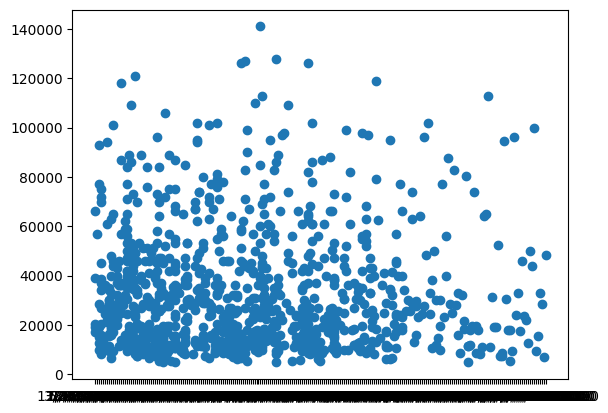

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

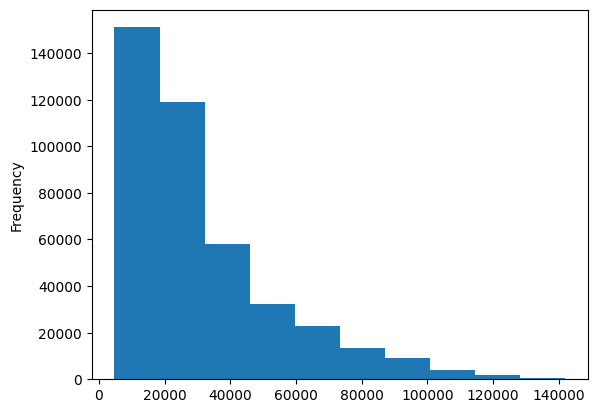

In [ ]:
df.SalePrice.plot.hist()


## Conversion and Sorting

In [ ]:
# Make copy of original dataset before making and changes.
df_tmp = df.copy()

In [ ]:
# Here datatype of saledate column is object. convert it to datetime datatype
df_tmp['saledate'] = pd.to_datetime(df_tmp['saledate'])
df_tmp['saledate'].dtype

dtype('<M8[ns]')

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

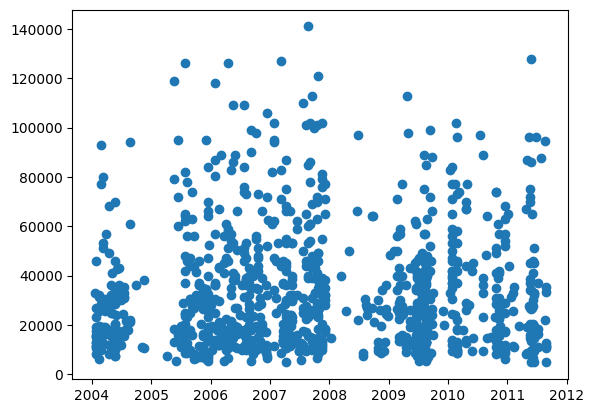

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_tmp["saledate"][:1000], df_tmp["SalePrice"][:1000])

In [ ]:
# Sort DataFrame in date order
df_tmp.sort_values(by=["saledate"], inplace=True, ascending=True)
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameters for saledate column

In [ ]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Handling missing values ( imputation techniques)

In [ ]:
# Work on YearMade column where values are equal to 1000.
unique_years = np.sort(df_tmp['YearMade'].unique())
median_year = int(df_tmp['YearMade'].median())
print(unique_years)
print('Median Year is: ', median_year)

[1000 1919 1920 1937 1942 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014]
Median Year is:  1995


In [ ]:
df_tmp[df_tmp['YearMade'] == 1000].shape, df_tmp.shape

((39391, 57), (412698, 57))

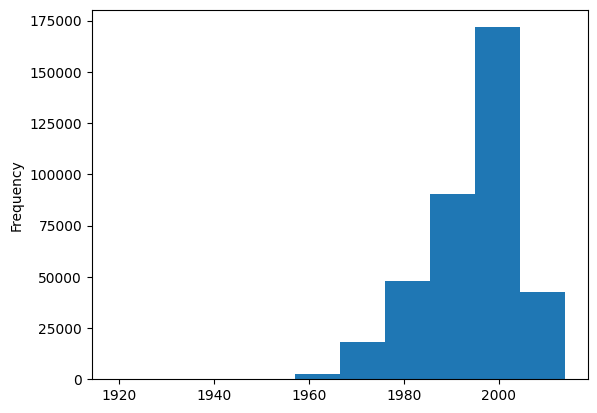

In [ ]:
df_tmp[df_tmp['YearMade'] != 1000]['YearMade'].plot(kind='hist');

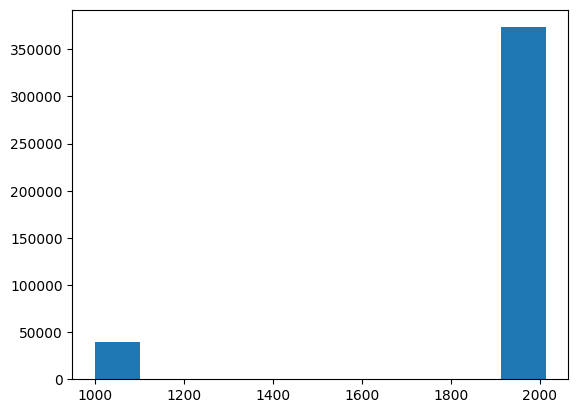

In [ ]:
plt.hist(df_tmp['YearMade']);

In [ ]:
## Replace YearMade with median value

df_tmp['YearMade'].replace(1000, median_year, inplace=True)
np.sort(df_tmp['YearMade'].unique())

array([1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014])

## Find columns whose type is numeric.

In [ ]:
for col in df_tmp.columns:
  if pd.api.types.is_numeric_dtype(df_tmp[col]):
    if df_tmp[col].isna().sum():
      print(col)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill missing value with median
for col in df_tmp.columns:
  if pd.api.types.is_numeric_dtype(df_tmp[col]):
    if df_tmp[col].isna().sum():
      # add a column which tell if data is missing or not
      df_tmp[col+'_is_missing'] = df_tmp[col].isna()
      df_tmp[col].fillna(df_tmp[col].median(), inplace=True)

In [ ]:
# loop doesn't print anything. Hence no numeric column has null value
for col in df_tmp.columns:
  if pd.api.types.is_numeric_dtype(df_tmp[col]):
    if df_tmp[col].isna().sum():
      print(col)

## Find and Fill the categorical columns

In [ ]:
# Find columns whose type is object and convert to category type
for col in df_tmp.columns:
  if pd.api.types.is_object_dtype(df_tmp[col]):
    df_tmp[col] = df_tmp[col].astype('category')

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

In [ ]:
# Now fill the null values.
for col in df_tmp.columns:
  if pd.api.types.is_categorical_dtype(df_tmp[col]):
    df_tmp[col+'_is_missing'] = df_tmp[col].isna()
    df_tmp[col] = df_tmp[col].cat.codes+1

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [ ]:
# Check missing values
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [ ]:
df_tmp.head().T


,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True



## Splitting data into train/valid sets

In [ ]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [ ]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation function

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_valid, val_preds):
  return np.sqrt(mean_squared_log_error(y_valid, val_preds))


def evaluate_scores(model):
  val_preds = model.predict(X_valid)
  val_preds = np.abs(val_preds)

  model_scores = {
      'R2_Score' : r2_score(y_valid, val_preds),
      'MSLE' : mean_squared_log_error(y_valid, val_preds),
      'RMSLE' : rmsle(y_valid, val_preds),
      'MAE' : mean_absolute_error(y_valid, val_preds),
  }
  return model_scores

## Fit Baseline Models



In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Model dictionary
baseline_models = {
    'ridge': Ridge(max_iter=2000),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(max_iter=2000),
    'rfr': RandomForestRegressor(max_samples=10000)
}

In [ ]:
%%time
baseline_score = {}

for model_name, model in baseline_models.items():
  model = model.fit(X_train, y_train)
  scores = evaluate_scores(model)
  baseline_score[model_name] = scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.64415e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.797e+13, tolerance: 2.129e+10
  model = cd_fast.enet_coordinate_descent(


CPU times: user 8min 25s, sys: 44.8 s, total: 9min 10s
Wall time: 5min 58s


In [ ]:
basemodel_df = pd.DataFrame(baseline_score)
basemodel_df

,ridge,lasso,elasticnet,rfr
R2_Score,0.547113,0.544358,0.413598,0.838973
MSLE,0.459364,0.474568,0.447102,0.084298
RMSLE,0.677764,0.688889,0.668657,0.290342
MAE,12556.034601,12589.016303,14233.555324,7036.731922


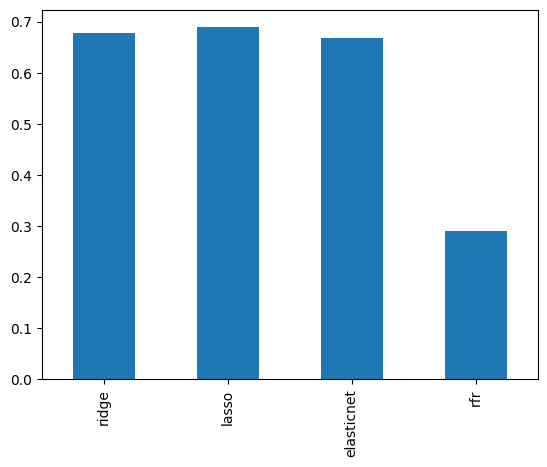

In [ ]:
basemodel_df.loc['RMSLE'].plot.bar();


## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for RandomizedSearchCV
rfr_rs_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

rfr_rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                                 param_distributions=rfr_rs_grid,
                                 cv=5,
                                 n_iter=10)
rfr_rs_model.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 7.66 s, total: 2min 35s
Wall time: 1min 46s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [ ]:
rfr_rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
rfr_rs_model.best_estimator_

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=3,
                      min_samples_split=16, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [ ]:
# No much improvement
rfr_rs_score = evaluate_scores(rfr_rs_model.best_estimator_)
rfr_rs_df = pd.DataFrame(rfr_rs_score, index=['rfr_rs']).T
rfr_rs_df

,rfr_rs
R2_Score,0.828858
MSLE,0.088322
RMSLE,0.297190
MAE,7269.558773


In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

rfr_gs_grid = {
    "n_estimators": [30, 40, 50],
    "max_depth": [None, 3],
    "min_samples_split": [12, 14, 16],
    "min_samples_leaf": [1,2],
    "max_features": [0.5, 1],
    "max_samples": [20000]
}

rfr_gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                                 param_grid=rfr_gs_grid,
                                 cv=3)
rfr_gs_model.fit(X_train, y_train)

CPU times: user 17min 39s, sys: 18.2 s, total: 17min 58s
Wall time: 11min 29s


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3], 'max_features': [0.5, 1],
                         'max_samples': [20000], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [12, 14, 16],
                         'n_estimators': [30, 40, 50]})

In [ ]:
rfr_gs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 20000,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 50}

In [ ]:
#  grid search model works better than other two

rfr_gs_score = evaluate_scores(rfr_gs_model.best_estimator_)
rfr_gs_df = pd.DataFrame(rfr_gs_score, index=['rfr_gs']).T
rfr_gs_df

,rfr_gs
R2_Score,0.849780
MSLE,0.078894
RMSLE,0.280880
MAE,6840.767381


In [ ]:
combined_df = pd.concat([rfr_base_df, rfr_rs_df, rfr_gs_df], axis=1)
combined_df

## Fitting on Most Ideal Hyperparamters

In [ ]:
%%time

# Most ideal hyperparamters
rfr_ideal_model = RandomForestRegressor(n_estimators=50,
                                    min_samples_leaf=1,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

rfr_ideal_model.fit(X_train, y_train)

CPU times: user 3min 26s, sys: 684 ms, total: 3min 27s
Wall time: 2min 6s


RandomForestRegressor(max_features=0.5, min_samples_split=12, n_estimators=50,
                      n_jobs=-1, random_state=42)

In [ ]:
rfr_ideal_score = evaluate_scores(rfr_ideal_model)
rfr_ideal_df = pd.DataFrame(rfr_ideal_score, index=['rfr_ideal']).T
rfr_ideal_df

,rfr_ideal
R2_Score,0.882327
MSLE,0.060891
RMSLE,0.246760
MAE,5955.706156


## Feature Importance

In [ ]:
feature_importance = rfr_ideal_model.feature_importances_


In [ ]:
feature_dict = dict(zip(X_train.columns, feature_importance))


In [ ]:
feature_df = pd.DataFrame(feature_dict, index=['Feature Importance']).T
feature_df.sort_values(by='Feature Importance', inplace=True, ascending=False)
feature_df

,Feature Importance
YearMade,0.182352
ProductSize,0.153962
fiSecondaryDesc,0.082100
saleYear,0.075107
fiModelDesc,0.049361
...,...
fiProductClassDesc_is_missing,0.000000
ProductGroupDesc_is_missing,0.000000
fiModelDesc_is_missing,0.000000
ProductGroup_is_missing,0.000000


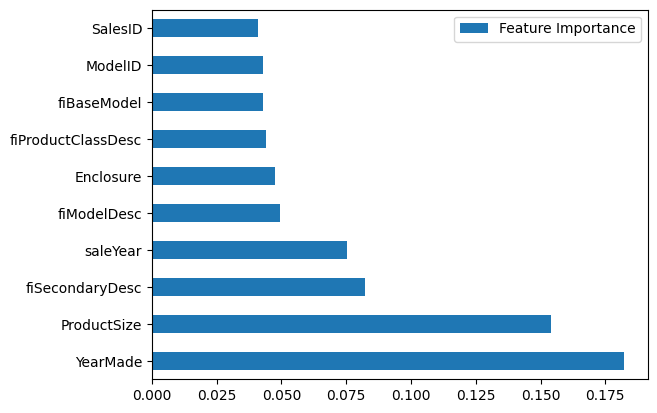

In [ ]:
# YearMade and ProductSize are the two most important features
feature_df[:10].plot.barh();


## Prediction on Test data

In [ ]:
!cp "/content/drive/MyDrive/Documents/Lekan/Machine Learning/Test.csv" "/content/"

In [ ]:
test_filepath = '/content/Test.csv'
test_df = pd.read_csv(test_filepath)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
# Preprocessing the data (getting the test dataset in the same format as out training dataset)

np.random.seed(42)

def preprocess_df(df_temp):
  df_temp['YearMade'].replace(1000, median_year, inplace=True)

  df_temp['saledate'] = pd.to_datetime(df_temp['saledate'])

  df_temp["saleYear"] = df_temp.saledate.dt.year
  df_temp["saleMonth"] = df_temp.saledate.dt.month
  df_temp["saleDay"] = df_temp.saledate.dt.day
  df_temp["saleDayofweek"] = df_temp.saledate.dt.dayofweek
  df_temp["saleDayofyear"] = df_temp.saledate.dt.dayofyear

  df_temp.drop('saledate', axis=1, inplace=True)

  for col in df_temp.columns:
    if pd.api.types.is_numeric_dtype(df_temp[col]):
      if df_temp[col].isna().sum():
        # add a column which tell if data is missing or not
        df_temp[col+'_is_missing'] = df_temp[col].isna()
        df_temp[col].fillna(df_temp[col].median(), inplace=True)

  for col in df_temp.columns:
    if pd.api.types.is_object_dtype(df_temp[col]):
      df_temp[col] = df_temp[col].astype('category')

  for col in df_temp.columns:
    if pd.api.types.is_categorical_dtype(df_temp[col]):
      df_temp[col+'_is_missing'] = df_temp[col].isna()
      df_temp[col] = df_temp[col].cat.codes+1

  return df_temp

In [ ]:
test_temp_df = test_df.copy()


In [ ]:
# Apply preprocess function on test data

test_temp_df = preprocess_df(test_temp_df)


In [ ]:
# We can find how the columns differ using sets
set(X_train.columns) - set(test_temp_df.columns)

set()

In [ ]:
# Add auctioneerID_is_missing to test data because it is missing from it

test_temp_df['auctioneerID_is_missing'] = False

In [ ]:
# Make columns of test and train in same order

test_temp_df = test_temp_df.reindex(X_train.columns, axis=1)

In [ ]:
assert test_temp_df.columns.tolist() == X_train.columns.tolist(), "Columns are not the same"

In [ ]:
# Predict on test data
test_preds = rfr_ideal_model.predict(test_temp_df)


In [ ]:
# Create a dataframe to store test_preds
df_preds = pd.DataFrame()
df_preds['SalesID'] = test_df['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18530.194071
1,1227844,22095.576680
2,1227847,53250.164876
3,1227848,72743.496256
4,1227863,57474.745573
5,1227870,29015.463455
6,1227871,26204.651778
7,1227879,13842.031267
8,1227880,14531.184828
9,1227881,34889.222986
